<a href="https://colab.research.google.com/github/Rudraashish7/Coronavirus_Tweets_Sentiment_Analysis_Classification_ML_Project/blob/main/Coronavirus_Tweets_Sentiment_Analysis_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [41]:
# Import Libraries
import numpy as np                                  # Import NumPy for numerical operations
import pandas as pd                                 # Import Pandas for data manipulation
import matplotlib.pyplot as plt                     # Import Matplotlib for data visualization
import seaborn as sns                               # Import Seaborn for enhanced data visualization
import string                                      # Import string module for handling string operations
from wordcloud import WordCloud                     # Import WordCloud for generating word clouds
import nltk                                       # Import NLTK (Natural Language Toolkit) for NLP tasks
nltk.download('all', quiet=True)                  # Downloading all NLTK data packages (quiet=True to suppress download messages)
from PIL import Image                            # Import the Python Imaging Library (PIL) module for image processing

# Model libraries for classification tasks
from sklearn.metrics import *                   # Import various metrics for model evaluation
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression for logistic regression modeling
from sklearn.tree import DecisionTreeClassifier     # Import DecisionTreeClassifier for decision tree modeling
from xgboost import XGBClassifier                 # Import XGBClassifier for XGBoost (extreme gradient boosting) modeling
from sklearn.model_selection import GridSearchCV    # Import GridSearchCV for hyperparameter tuning using cross-validation
from sklearn.svm import SVC                       # Import SVC for support vector machine modeling
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier for k-nearest neighbors modeling

# Metrics and evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report  # Import confusion_matrix and classification_report for model evaluation
from sklearn.model_selection import cross_val_score                    # Import cross_val_score for cross-validation of models

# Suppressing warnings
import warnings                                     # Import warnings module to suppress warning messages
warnings.filterwarnings('ignore')                    # Ignore any warning messages generated during the code execution


### Dataset Loading

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Load Dataset
tweet_df = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT - SUPERVISED LEARNING - CLASSIFICATION/Coronavirus Tweets.csv", encoding='latin-1')

### Dataset First View

In [44]:
# Display the first few rows of the DataFrame with a cool color gradient
# This code uses the 'head()' method to display the first few rows of the DataFrame.
# The 'style.background_gradient()' method applies a color gradient to the background of the DataFrame.
# The 'cmap='cool'' argument specifies the colormap to use.
tweet_df.head().style.background_gradient(cmap='cool')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,nan,16-03-2020,"My food stock is not the only one which is empty... PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. Stay calm, stay safe. #COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,nan,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak. Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage... #CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


### Dataset Rows & Columns count

In [45]:
# Dataset Rows & Columns count
# Get the shape of the DataFrame
tweet_df.shape

(41157, 6)

In [46]:
# Get the column names of the DataFrame
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

### Dataset Information

In [47]:
# Dataset Info
# Display concise summary of the DataFrame
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [48]:
# Dataset Duplicate Value Count
# Check for duplicate rows in the DataFrame
num_duplicates = tweet_df.duplicated().sum()
num_duplicates

0

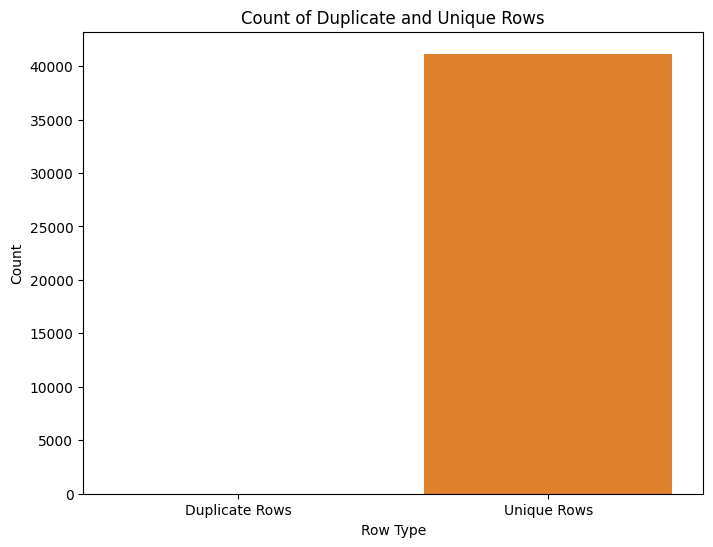

In [49]:
# Create a bar plot to showcase the count of duplicate rows
plt.figure(figsize=(8, 6))
sns.barplot(x=["Duplicate Rows", "Unique Rows"], y=[num_duplicates, len(tweet_df) - num_duplicates])
plt.xlabel("Row Type")
plt.ylabel("Count")
plt.title("Count of Duplicate and Unique Rows")
plt.show()

The dataset used in the analysis is free from duplicate values. All the rows in the dataset are unique, and there are no instances where multiple rows have identical data across all columns. As a result, the dataset provides distinct and non-repetitive information, ensuring that each observation contributes uniquely to the analysis without any duplications.

#### Missing Values/Null Values

In [50]:
# Missing Values/Null Values Count
# Check for missing values in the DataFrame
missing_values_count = tweet_df.isna().sum()
missing_values_count

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

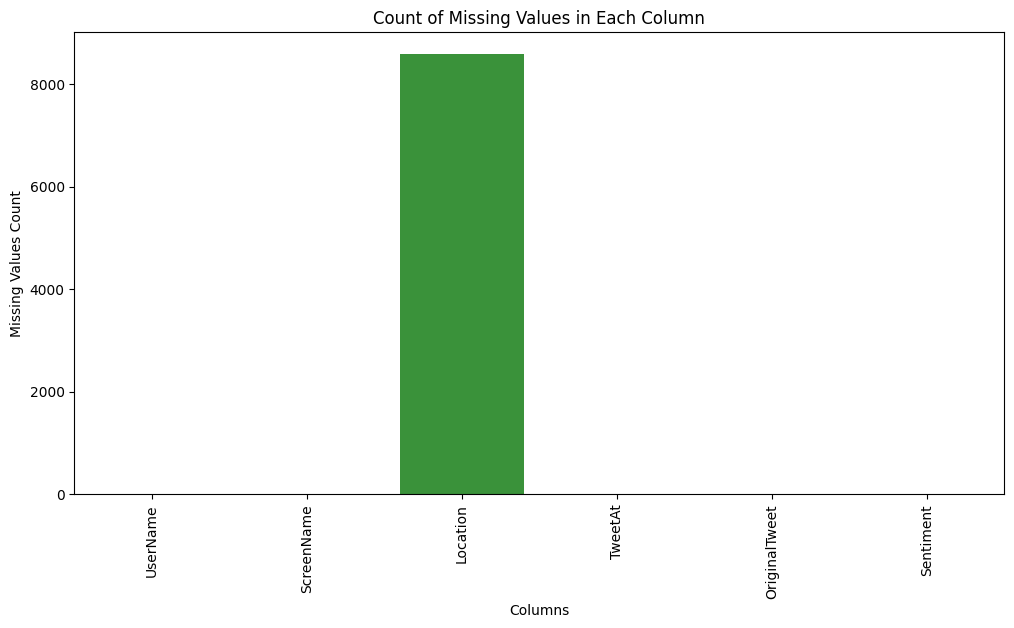

In [51]:
# Visualizing the missing values
# Create a bar plot to showcase the count of missing values in each column
plt.figure(figsize=(12, 6))  # Set the size of the figure for better visualization

# Use the seaborn 'barplot()' function to create the bar plot
# x=missing_values_count.index: Set the x-axis labels using column names (index of the 'missing_values_count' Series).
# y=missing_values_count.values: Set the y-axis values using the count of missing values for each column.
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)

plt.xlabel("Columns")  # Set the x-axis label to "Columns" for column names
plt.ylabel("Missing Values Count")  # Set the y-axis label to "Missing Values Count" for count values
plt.title("Count of Missing Values in Each Column")  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability when there are many columns
plt.show()  # Display the bar plot

### What did you know about your dataset?

In this dataset, there are six columns: 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', and 'Sentiment'. Among these columns, the 'Location' column contains duplicated values, with a total of 8590 duplicate entries. Identifying and handling these duplicate values will be important for our classification machine learning project to ensure the data is clean and accurate before proceeding with the analysis.

## ***2. Understanding Your Variables***

In [52]:
# Dataset Columns
# Get the column names of the DataFrame
columns = tweet_df.columns
columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [53]:
# Dataset Describe
# Generate descriptive statistics for the DataFrame, including all data types (include='all')
description = tweet_df.describe(include='all').style.background_gradient(cmap='cool')
description

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,nan,nan,12220,30,41157,5
top,nan,nan,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Positive
freq,nan,nan,540,3448,1,11422
mean,24377.000000,69329.000000,nan,nan,nan,nan
std,11881.146851,11881.146851,nan,nan,nan,nan
min,3799.000000,48751.000000,nan,nan,nan,nan
25%,14088.000000,59040.000000,nan,nan,nan,nan
50%,24377.000000,69329.000000,nan,nan,nan,nan
75%,34666.000000,79618.000000,nan,nan,nan,nan


### Variables Description

The dataset under consideration contains information about tweets related to the Coronavirus pandemic. It includes valuable attributes extracted from the tweets, which can aid in understanding public sentiments, opinions, and geographical distribution during the pandemic. The dataset consists of several columns, each holding specific information about the tweets and the users who posted them. The columns include UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment. Let's explore each of these columns to gain insights into the data and better comprehend the characteristics of the tweets in this dataset:


*   UserName: This column contains the username of the person who authored the tweet on Twitter.

*   ScreenName: This column contains the screen name or handle of the Twitter user who posted the tweet.

*   Location: This column represents the location information provided by the Twitter user in their profile. It may include details about their city, state, country, or any other geographic location they have specified.
*   TweetAt: This column stores the date and time when the tweet was posted on Twitter.


*   OriginalTweet: This column contains the actual content of the tweet that was posted by the user.


*   Sentiment: This column contains the sentiment label assigned to the tweet based on the results of a sentiment analysis algorithm. The sentiment label can indicate whether the tweet's content is positive, negative, extremely positive, extremely negative, or neutral, depending on the sentiment analysis results.

The dataset's attributes offer a comprehensive view of the tweets, allowing us to explore public sentiments, identify tweet patterns, and potentially build a classification model to categorize tweets based on their sentiment.

### Check Unique Values for each variable.

In [54]:
# Check Unique Values for each variable.
# Display unique values in each column of the DataFrame

unique_values = tweet_df.apply(lambda col: col.unique())
print(unique_values)

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [55]:
# Get the unique sentiment labels present in the 'Sentiment' column and print them
unique_sentiments = tweet_df['Sentiment'].unique()

# Display the unique sentiment labels in the 'Sentiment' column
print("Unique Sentiment Labels:")
print(unique_sentiments)

Unique Sentiment Labels:
['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


In [56]:
# Get the unique locations present in the 'Location' column and print them
unique_locations = tweet_df['Location'].unique()

# Display the unique locations in the 'Location' column
print("Unique Locations:")
print(unique_locations)

Unique Locations:
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [57]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [58]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [59]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [60]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [61]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [62]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [63]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [64]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [65]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [66]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [67]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [68]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [69]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [70]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [71]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [72]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [73]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [74]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [76]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [77]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [78]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [79]:
# Expand Contraction

#### 2. Lower Casing

In [80]:
# Lower Casing

#### 3. Removing Punctuations

In [81]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [82]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [83]:
# Remove Stopwords

In [84]:
# Remove White spaces

#### 6. Rephrase Text

In [85]:
# Rephrase Text

#### 7. Tokenization

In [86]:
# Tokenization

#### 8. Text Normalization

In [87]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [88]:
# POS Taging

#### 10. Text Vectorization

In [89]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [90]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [91]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [92]:
# Transform Your data

### 6. Data Scaling

In [93]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [94]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [96]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [97]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [98]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [99]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [100]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [102]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [103]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [105]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [106]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***